###Project Name : Emotion-based Natural Language Processing (NLP) Model with LSTM using TensorFlow
###Project Description : This project aims to implement Natural Language Processing (NLP) using TensorFlow with a focus on emotion datasets. It utilizes a sequential model architecture that integrates LSTM layers to understand and process text containing emotions. The main goal is to improve the understanding of emotional context in text, both for sentiment classification and emotion analysis.
###Dataset : Emotion dataset
###Tools : Google Colaboratory

Import

In [ ]:
import pandas as pd
df = pd.read_csv('Emotion_final.csv')

In [ ]:
df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


one-hot-encoding dan dataframe baru

In [ ]:
category = pd.get_dummies(df.Emotion)
df_new = pd.concat([df, category], axis=1)
df_new = df_new.drop(columns='Emotion')
df_new

,Text,anger,fear,happy,love,sadness,surprise
0,i didnt feel humiliated,0,0,0,0,1,0
1,i can go from feeling so hopeless to so damned...,0,0,0,0,1,0
2,im grabbing a minute to post i feel greedy wrong,1,0,0,0,0,0
3,i am ever feeling nostalgic about the fireplac...,0,0,0,1,0,0
4,i am feeling grouchy,1,0,0,0,0,0
...,...,...,...,...,...,...,...
21454,Melissa stared at her friend in dism,0,1,0,0,0,0
21455,Successive state elections have seen the gover...,0,1,0,0,0,0
21456,Vincent was irritated but not dismay,0,1,0,0,0,0
21457,Kendall-Hume turned back to face the dismayed ...,0,1,0,0,0,0


Tipe Data Numpy Array

In [ ]:
tulisan = df_new['Text'].values
label = df_new[['anger', 'fear', 'happy', 'love', 'sadness', 'surprise']].values

In [ ]:
tulisan

array(['i didnt feel humiliated',
       'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
       'im grabbing a minute to post i feel greedy wrong', ...,
       'Vincent was irritated but not dismay',
       'Kendall-Hume turned back to face the dismayed coup',
       'I am dismayed , but not surpris'], dtype=object)

In [ ]:
label

array([[0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0]], dtype=uint8)

Training dan Testing Data

In [ ]:
from sklearn.model_selection import train_test_split
tulisan_latih, tulisan_test, label_latih, label_test = train_test_split(tulisan, label, test_size=0.2)

Tokenizer dan konversi menjadi sequence

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(tulisan_latih)
tokenizer.fit_on_texts(tulisan_test)

sekuens_latih = tokenizer.texts_to_sequences(tulisan_latih)
sekuens_test = tokenizer.texts_to_sequences(tulisan_test)

padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

Embedding

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 16)          80000     
                                                                 
 lstm_2 (LSTM)               (None, 64)                20736     
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 6)                 390       
                                                                 
Total params: 117,702
Trainable params: 117,702
Non-tr

Callbacks

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc') > 0.9):
      print("\nAkurasi lebih dari 90%")
      self.model.stop_trainging = True

callbacks = myCallback()

Fit model

In [ ]:
num_epochs = 30
history = model.fit(padded_latih, label_latih, epochs=num_epochs,
                    validation_data=(padded_test, label_test), verbose=1, validation_steps=25,
callbacks=[callbacks])

Epoch 1/30
537/537 [==============================] - 6s 8ms/step - loss: 1.4785 - acc: 0.3531 - val_loss: 1.2112 - val_acc: 0.4271
Epoch 2/30
537/537 [==============================] - 4s 8ms/step - loss: 1.1149 - acc: 0.5224 - val_loss: 1.0639 - val_acc: 0.5881
Epoch 3/30
537/537 [==============================] - 4s 7ms/step - loss: 0.9000 - acc: 0.6574 - val_loss: 0.8191 - val_acc: 0.7197
Epoch 4/30
537/537 [==============================] - 4s 7ms/step - loss: 0.7373 - acc: 0.7405 - val_loss: 0.6879 - val_acc: 0.7682
Epoch 5/30
537/537 [==============================] - 4s 7ms/step - loss: 0.6055 - acc: 0.7997 - val_loss: 0.5891 - val_acc: 0.8089
Epoch 6/30
537/537 [==============================] - 4s 7ms/step - loss: 0.5112 - acc: 0.8322 - val_loss: 0.4916 - val_acc: 0.8320
Epoch 7/30
537/537 [==============================] - 4s 7ms/step - loss: 0.4323 - acc: 0.8621 - val_loss: 0.4706 - val_acc: 0.8462
Epoch 8/30
537/537 [==============================] - 4s 7ms/step - loss: 0.

Model Accuracy

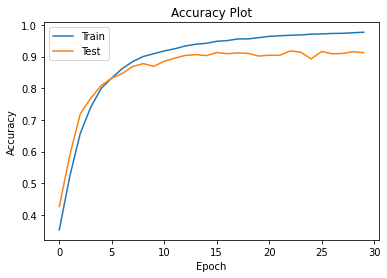

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Model Loss

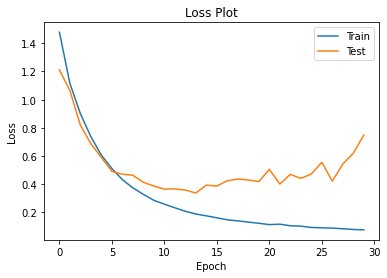

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()